<img src="images/pepito_topdown.jpg">

In [1]:
from astropy import units as u
import numpy as np

# Pepito Characterization Exercise & Lab

The fiber output from Pepito has 7 spots that each have diameter 100$\mu$m.  They are separated by less than that, maybe $\sim10\mu$m.

The expected input is from an f/10 beam, so the first lens is an f/10 collimator.

Parallel rays come and hit the diffraction grating, which has 830 lines/mm.  It is about 2cm long.

The diffracted light is then focused onto the CCD with an f/10 camera.

The SBIG has 9 micron pixels.

# Fill in the blanks.

Questions are asked using

## bigger
### fonts

The angle of the bend in Pepito is _approximately_ 20 degrees.

## Using a protractor or other device, what angle do you measure for the whole system?

In [2]:
angle = 22

The angle of the grating is _supposedly_ 0 degrees with respect to the collimated beam - we'll assume that at the start of this exercise.   But, now's a good time to measure it.

## Using the same tool, what is the angle of the grating with respect to the incoming light?

(you won't use this until the [redesign](#Redesign-questions) section below

In [3]:
grating_angle = 0

The information above comes from lab notes and Amanda Townsend's thesis.  We will aim to verify these measurements.

In [4]:
grooves_per_mm = 830 *u.mm**-1
pixel_size = 10*u.um
f_cam = 10 * u.cm
f_cam = f_cam.to(u.mm)

### At what angle is the first order for $\lambda=4000,5000,6000 \dot{A}$?

Recall the grating equation:

$$ n \lambda = D \sin \theta $$

where

 * $n$ is the order number and must be an integer
 * $\lambda$ is the wavelength
 * $D$ is the distance between holes (gaps) in the grating
 * $\theta$ is the angle defined such that $\theta=0$ is perpendicular to the grating (or parallel to the direction of the light) 
 

In [5]:
order_number = 1
wavelength = [4000,5000,6000]*u.AA

D = 1/ grooves_per_mm 

theta = np.arcsin(wavelength / D)
theta = theta.to(u.deg)
theta

<Quantity [19.39021239, 24.51931648, 29.86776904] deg>

### What wavelength is centered assuming the angle is 20 deg?

In [6]:
degrees20 = 20*u.deg
degrees20 = degrees20.to(u.rad)

wavelength_20 = (D) * np.sin(degrees20)
wavelength_20 = wavelength_20.decompose()
wavelength_20 = wavelength_20.to(u.AA)
wavelength_20

<Quantity 4120.72461838 Angstrom>

### What is the wavelength difference per pixel?

Recall that the spatial separation per unit wavelength is:
$$ \frac{dx}{d\lambda} = \frac{\Delta x}{\Delta \lambda} =  \frac{ f_{cam} n }{D \cos \theta}$$
where $n$ is the order number, $D$ is the distance between gaps in the grating, $dx\sim\Delta x$ is the pixel spacing, and $d\lambda\sim\Delta\lambda$ is the wavelength spacing.

In [7]:
d_groove = grooves_per_mm**-1

dispersion = f_cam / d_groove /  np.cos(degrees20)
dispersion

<Quantity 88326.7551155>

In [8]:
dlambda_per_pix = d_groove *  np.cos(degrees20) / f_cam
dlambda_per_pix

<Quantity 1.13215978e-05>

### What is the resolution limit from our slit?

Recall, to be diffraction-limited, the spectrograph must have
$$ \sin \theta_{slit} < \frac{n \Delta \lambda}{D}$$

In [9]:
thing = (dlambda_per_pix * pixel_size )/ d_groove
thing = thing.decompose()
slit_resolution_limit = np.arcsin(thing)
slit_resolution_limit = slit_resolution_limit.to(u.arcsec)
slit_resolution_limit

<Quantity 19.38255166 arcsec>

### What is the effect if our slit is bigger than this?

If the slit is bigger then our resolution limit gets smaller approaching 0

Assume that the size of the fiber pinholes is 100 $\mu$m.

Our telescope is a 14" f/10.

### Is the fiber slit limiting our resolution?

In [10]:
focal_length = (14 * u.imperial.inch) * 10
plate_scale = 1 / focal_length

thing2 = (100*u.um) * plate_scale
thing2 = thing2.decompose()

angsize_of_slit = thing2 *(u.rad)
angsize_of_slit = angsize_of_slit.to(u.arcsec)
angsize_of_slit

<Quantity 5.80047262 arcsec>

In [11]:
lim_slit = np.sin(slit_resolution_limit)
lim_fiber = np.sin(angsize_of_slit)

print(lim_slit)
print(lim_fiber)

9.396926207859084e-05
2.81214848106917e-05


### What is the expected resolution of Pepito at 5000 Angstroms??

In [12]:
# R = lambda/ del lambda
resolution = (5000 * u.AA)/dlambda_per_pix
resolution = resolution.decompose()
resolution

<Quantity 0.04416338 m>

## What if we use the other grating?

Our second grating has 1200 grooves/mm.

### Assume it's operating at the same angle.  What wavelength is at the center?

$$ \sin \theta_{slit} < \frac{n \Delta \lambda}{D}$$

In [13]:
grooves_per_mm_2 = 1200*u.mm**-1

In [14]:
D2 = 1/grooves_per_mm_2

wavelength_20_D2 = (D2) * np.sin(degrees20)
wavelength_20_D2 = wavelength_20_D2.decompose()
wavelength_20_D2 = wavelength_20_D2.to(u.AA)
wavelength_20_D2

<Quantity 2850.16786105 Angstrom>

### What angle do we need to position our camera at if we want the same central wavelength as the first grating?

In [15]:
angle_to_match_800gmm_grating = np.arcsin(wavelength_20 / D2)
angle_to_match_800gmm_grating = angle_to_match_800gmm_grating.to(u.deg)
angle_to_match_800gmm_grating

<Quantity 29.63592521 deg>

### What's the effective resolution (at the same central wavelength)?

In [16]:
dispersion_1200gmm_grating = f_cam / D2 /  np.cos(angle_to_match_800gmm_grating)
dispersion_1200gmm_grating

<Quantity 138060.35886423>

In [17]:
dlambda_per_pix_1200gmm_grating = (D2 *  np.cos(angle_to_match_800gmm_grating) / f_cam )
dlambda_per_pix_1200gmm_grating ## should be in AA ?

<Quantity 7.24320875e-06>

### What is the resolution?

In [18]:
resolution2 = (5000 * u.AA)/dlambda_per_pix_1200gmm_grating
resolution2 = resolution2.decompose()
resolution2

<Quantity 0.06903018 m>

### What is the slit size required for our system to be grating-limited?

In [19]:
thing2 = (dlambda_per_pix_1200gmm_grating * pixel_size )/ D2
thing2 = thing2.decompose()
slit_resolution_limit_1200gmm_grating = np.arcsin(thing2)
slit_resolution_limit_1200gmm_grating = slit_resolution_limit_1200gmm_grating.to(u.arcsec)
slit_resolution_limit_1200gmm_grating

<Quantity 17.92822863 arcsec>

# Redesign questions

Remember that the incident angle of light can be nonzero, resulting in the modified grating equation

$$ n \lambda = D \left(\sin \theta_{in} + \sin \theta_{out}\right) $$


Our spectrograph has a fixed angle, which you've measured (but hope to measure even more precisely).

### Given that measured angle of the _whole system_, at what angles is it possible to center $\lambda=500$ nm, assuming we're using the grating in its first order?

(Exercise for students)


In [20]:
import pylab as pl
pl.rcParams['figure.facecolor'] = 'w'
pl.rcParams['font.size'] = 14

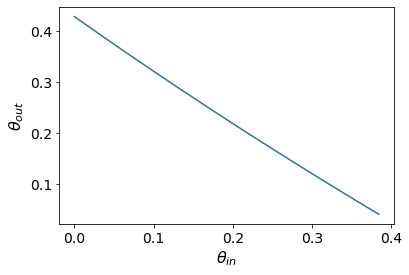

In [21]:
angle = (22*u.degree).to(u.rad)
theta_in = np.linspace(0,angle)
wavelength_500 = 500 * u.nm

theta_out = np.arcsin((wavelength_500 / D ) - np.sin(theta_in))
pl.plot(theta_in, theta_out)
pl.xlabel(r"$\theta_{in}$", fontsize=16)
pl.ylabel(r"$\theta_{out}$", fontsize=16);

Say we want to position 500 nm at the center of our detector, and the angle of the system is still the same we assumed above.

### Can we rotate the grating such that 500nm will be centered on the detector?  If so, at what angle?

In [22]:
theta_in1 = 22 * u.deg
theta_out = np.arcsin((wavelength_500 / D) - np.sin(theta_in1))
theta_out.to(u.deg)

<Quantity 2.31500155 deg>

### Can we rotate the grating such that 400nm will be centered on the detector?  If so, at what angle?

In [23]:
theta_in1 = 22 * u.deg
wavelength_400 = 400 * u.nm
theta_out = np.arcsin((wavelength_400 / D) - np.sin(theta_in1))
theta_out.to(u.deg)

<Quantity -2.44191717 deg>

Can't be roated

### Can we rotate the grating such that 656.3nm will be centered on the detector?  If so, at what angle?  Why is this a significant wavelength?

In [24]:
theta_in1 = 22 * u.deg
wavelength_400 = 656.3 * u.nm
theta_out = np.arcsin((wavelength_400 / D) - np.sin(theta_in1))
theta_out.to(u.deg)

<Quantity 9.79493611 deg>

first balmer line of hydrogen

### What is the actual angle of the grating?  And what central wavelength does it imply?

In [25]:
theta_in1 = 20 * u.deg
theta_out = 0 * u.deg

central_wavelength = D * (np.sin(theta_in1) + np.sin(theta_out))
central_wavelength.to(u.nm)

<Quantity 412.07246184 nm>

can assume angle is zero with respect to incoming light 

### Can we rotate the grating such that 400nm will be centered on the detector?  If so, at what angle?

In [26]:
theta_in1 = 22 * u.deg
wavelength_420 = 420 * u.nm
theta_out = np.arcsin((wavelength_420 / D) - np.sin(theta_in1))
theta_out.to(u.deg)

<Quantity -1.49023606 deg>

### What range of wavelengths can we center by rotating the grating?

In [27]:
theta_in1 = 20 * u.deg
theta_out_range = (0,91,1) * u.deg

central_wavelength = D * (np.sin(theta_in1) + np.sin(theta_out_range))

print("min'",np.min(central_wavelength.to(u.nm)))
print("max'",np.max(central_wavelength.to(u.nm)))

min' 412.0724618381551 nm
max' 1616.708239135012 nm


# Lab Measurements Part II

Each group will need to take turns performing these measurements, since we have only 1 Pepito.

Set up Pepito to take in-lab spectra.  Obtain spectra of:

* The overhead fluorescent bulbs
* Helium
* Hydrogen
* Neon

Ensure that the spectra are obtained in-focus and properly aligned on the detector.

Be careful that the fiber does not rotate between observations!

Examine the spectra. Start with hydrogen.

Recall from your quantum class that the wavelength of hydrogen lines is given by:

$$ \frac{1}{\lambda} = Ry \left(\frac{1}{n_l}^2 - \frac{1}{n_u}^2\right)$$

### What lines are in the spectrum?

CCD is sensitive to ~ 400 to ~1000 nm

what hydrogen lines could be in our spectrum

In [28]:
#R = 109677.57 *(u.cm)**-1
#R = R.to(u.nm**-1)
#
#n1 = [1,2,3,4,5,6,7,8]
#n2 = [2,3,4,5,6,7,8,9]
#
#lam_inv = []
#lam = []
#
#for i in n1:
#    lam_inv.append( * (1/n1)**2 - (1/n2)**2)
#    lam.append(1/lam_inv)
    
#lam_inverse = R * ((1/n1)**2 - (1/n2)**2)
#lam = 1/lam_inverses

n = 2 Balmer

n = 3 6562.6 h alpha

n = 4 4861 beta

n = 5 4339.4 gamma

n = 6 4100.7 delta

below 4000 angstroms blue cutoff, atmosphere is non transmissive. These lines are the primary ones we'll see, h alpha always the brightest. These are the only visible hydrogen lines

In [29]:
from PIL import Image as PILImage
import numpy as np
import pylab as pl
pl.rcParams['image.origin'] = 'lower'  # we want to show images, not matrices, so we set the origin to the lower-left
pl.matplotlib.style.use('dark_background')  # Optional configuration: if run, this will look nice on dark background notebooks

In [30]:
from astropy import units as u
from astropy.modeling.polynomial import Polynomial1D
from astropy.modeling.models import Gaussian1D, Linear1D
from astropy.modeling.fitting import LinearLSQFitter
from IPython.display import Image
# astroquery provides an interface to the NIST atomic line database
from astroquery.nist import Nist
from IPython.display import Image

In [31]:
import os
from astropy.io import fits

In [32]:
hg_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\BestGroup_Aug31\\lights_straight_up.FIT"
hy_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\BestGroup_Aug31\\hydrogen.FIT"
he_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\BestGroup_Aug31\\helium.FIT"
ne_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\BestGroup_Aug31\\neon.FIT"
sun_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\BestGroup_Aug31\\sun_10s.FIT"
hy1_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\BestGroup_Aug31\\group1_hydrogen_10s.FIT"
hy2_filename = "\\Users\\Sydnee O'Donnell\\OneDrive\\UF\\Obs Tech 2\\BestGroup_Aug31\\group2_hydrogen_10s.FIT"

In [33]:
hg_image = fits.getdata(hg_filename)
hy_image = fits.getdata(hy_filename)
he_image = fits.getdata(he_filename)
ne_image = fits.getdata(ne_filename)
sun_image = fits.getdata(sun_filename)
hy1_image = fits.getdata(hy1_filename)
hy2_image = fits.getdata(hy2_filename)

### Crop images to filter out any hot pixles and background noise so our mean isn't poluted

In [34]:
hg_spectrum = hg_image[350:450,0:900].mean(axis=0)
hy_spectrum = hy_image[350:450,0:900].mean(axis=0)
he_spectrum = he_image[350:450,0:900].mean(axis=0)
ne_spectrum = ne_image[350:450,0:900].mean(axis=0)
sun_spectrum = sun_image[350:450,0:900].mean(axis=0)
hy1_spectrum = hy1_image[350:450,0:900].mean(axis=0)
hy2_spectrum = hy2_image[350:450,0:900].mean(axis=0)

Text(0.5, 1.0, 'Spectra')

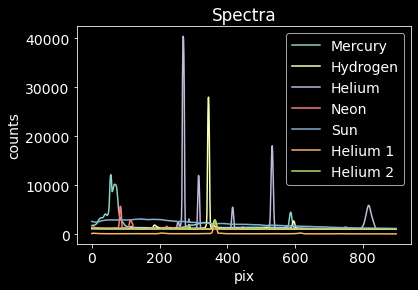

In [35]:
xaxis = np.arange(hg_image[350:450,0:900].shape[1])
pl.plot(xaxis, hg_spectrum, label='Mercury')
pl.plot(xaxis, hy_spectrum, label='Hydrogen')
pl.plot(xaxis, he_spectrum, label='Helium')
pl.plot(xaxis, ne_spectrum, label='Neon')
pl.plot(xaxis, sun_spectrum, label='Sun')
pl.plot(xaxis, hy1_spectrum, label='Helium 1')
pl.plot(xaxis, hy2_spectrum, label='Helium 2')
pl.legend(loc='best');
pl.xlabel("pix")
pl.ylabel('counts')
pl.title("Spectra")

## Mercury 

In [36]:
tableHg = Nist.query(4000 * u.AA, 7000 * u.AA, linename="Hg")
print(tableHg)

Spectrum  Observed    Ritz   Transition ... Type   TP    Line  
-------- --------- --------- ---------- ... ---- ----- --------
    Hg I   4027.09   4027.15    24831.8 ...   --    -- L7588c86
   Hg II  4027.339        --   24830.29 ...   --    --   L11760
   Hg II  4041.599 4041.6036   24742.69 ...   -- T7226   L11760
   Hg II  4041.718        --  24741.956 ...   --    --   L11760
    Hg I 4047.7081 4047.7074  24705.339 ...   -- T5292    L7247
   Hg II  4048.883  4048.886  24698.167 ...   -- T7226   L11760
    Hg I 4078.9883 4078.9883  24515.883 ...   -- T5292    L7247
    Hg I  4109.213  4109.214   24335.56 ...   -- T3462    L3451
   Hg II  4121.602 4121.6094  24262.408 ...   -- T7226   L11760
  Hg III   4123.23        --    24252.8 ...   --    --    L3332
     ...       ...       ...        ... ...  ...   ...      ...
    Hg I    6872.6        --    14550.6 ...   --    -- L7590c86
    Hg I    6882.3   6882.71    14530.0 ...   --    -- L7590c86
    Hg I  6890.465  6890.463   14512.81 

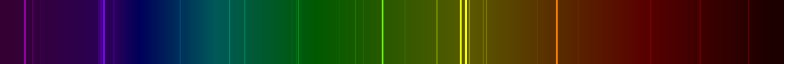

Text(0.5, 1.0, 'Mercury')

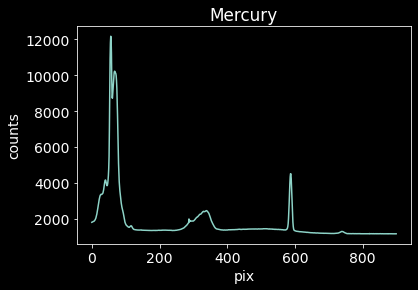

In [37]:
pl.plot(xaxis, hg_spectrum);
pl.xlabel("pix")
pl.ylabel('counts')
pl.title("Mercury")

In [38]:
guessed_wavelengths_hg = [2280, 1300, 1590]
guessed_xvals_hg = [50, 330, 586]

In [39]:
npixels = 15
improved_xval_guesses_hg = [np.average(xaxis[g-npixels:g+npixels],
                                    weights=hg_spectrum[g-npixels:g+npixels] - np.median(hg_spectrum))
                         for g in guessed_xvals_hg]
improved_xval_guesses_hg

[53.66590615169603, 330.1679708239513, 587.1014495476982]

Text(0.5, 1.0, 'Mercury')

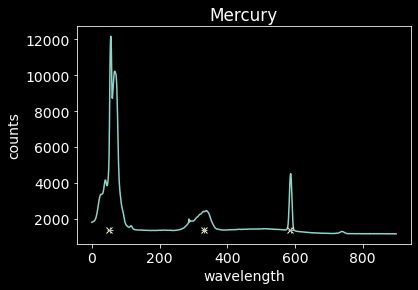

In [40]:
pl.plot(xaxis, hg_spectrum)
pl.plot(guessed_xvals_hg, [1400]*3, 'x')
pl.plot(improved_xval_guesses_hg, [1400]*3, '+');
pl.xlabel("wavelength")
pl.ylabel('counts')
pl.title("Mercury")

In [41]:
linfitter = LinearLSQFitter()

In [42]:
wlmodel = Linear1D()
linfit_wlmodel = linfitter(model=wlmodel, x=improved_xval_guesses_hg, y=guessed_wavelengths_hg)
wavelengths = linfit_wlmodel(xaxis) * u.nm
linfit_wlmodel

<Linear1D(slope=-1.32202148, intercept=2151.19912052)>

Text(0.5, 1.0, 'Mercury')

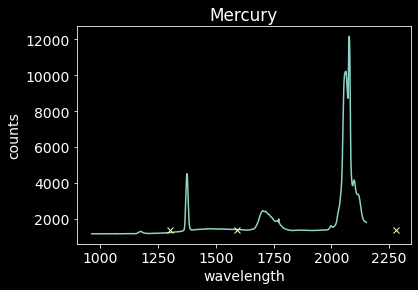

In [43]:
pl.plot(wavelengths, hg_spectrum)
pl.plot(guessed_wavelengths_hg, [1400]*3, 'x');
pl.xlabel("wavelength")
pl.ylabel('counts')
pl.title("Mercury")

Text(0.5, 1.0, 'Mercury')

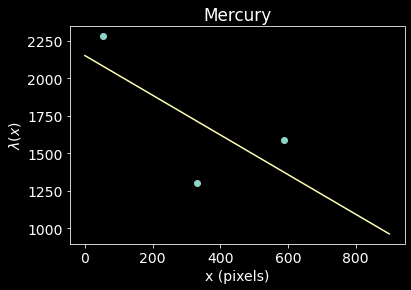

In [44]:
pl.plot(improved_xval_guesses_hg, guessed_wavelengths_hg, 'o')
pl.plot(xaxis, wavelengths, '-')
pl.ylabel("$\lambda(x)$")
pl.xlabel("x (pixels)")
pl.title("Mercury")

In [45]:
# we adopt the minimum/maximum wavelength from our linear fit
minwave = wavelengths.min()
maxwave = wavelengths.max()
# then we search for atomic lines
# We are only interested in neutral lines, assuming the lamps are not hot enough to ionize the atoms
mercury_lines = Nist.query(minwav=minwave,
                           maxwav=maxwave,
                           linename='Hg I')
hydrogen_lines = Nist.query(minwav=minwave,
                           maxwav=maxwave,
                           linename='H I')
helium_lines = Nist.query(minwav=minwave,
                           maxwav=maxwave,
                           linename='He I')
neon_lines = Nist.query(minwav=minwave,
                        maxwav=maxwave,
                        linename='Ne I')

Text(0.5, 1.0, 'Mercury')

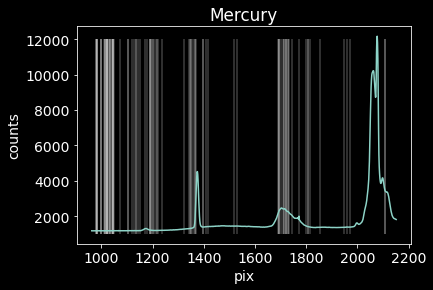

In [46]:
pl.plot(wavelengths, hg_spectrum)
pl.vlines(mercury_lines['Observed'], 1000, 12000, 'w', alpha=0.25);
pl.xlabel("pix")
pl.ylabel('counts')
pl.title("Mercury")

# Hydrogen  

In [47]:
tableHI = Nist.query(4000 * u.AA, 7000 * u.AA, linename="H I")
print(tableHI)

   Observed        Ritz       Transition   Rel.  ... Type   TP    Line  
------------- ------------- ------------- ------ ... ---- ----- --------
           -- 4102.85985517 24373.2429403     -- ...   -- T8637       --
           -- 4102.86191087 24373.2307283     -- ...   -- T8637       --
           --     4102.8632     24373.223     -- ...   --    --      c57
4102.86503481 4102.86503481 24373.2121704     -- ...   E2    --   L11759
           -- 4102.86579132 24373.2076763     -- ...   -- T8637       --
4102.86785074 4102.86785074 24373.1954423     -- ...   M1    --   L11759
           --  4102.8680725 24373.1941249     -- ...   -- T8637       --
     4102.892     4102.8991      24373.05  70000 ...   -- T8637 L7436c29
           --     4102.8922     24373.051     -- ...   --    --      c58
           -- 4102.92068748 24372.8815683     -- ...   -- T8637       --
          ...           ...           ...    ... ...  ...   ...      ...
           --   6564.564672  15233.302588     -- ..

Text(0.5, 1.0, 'Hydrogen spectrum')

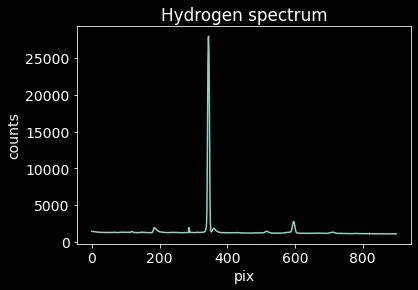

In [48]:
pl.plot(xaxis, hy_spectrum);
pl.xlabel("pix")
pl.ylabel('counts')
pl.title("Hydrogen spectrum")

Text(0.5, 1.0, 'Hydrogen Spectra Overlay')

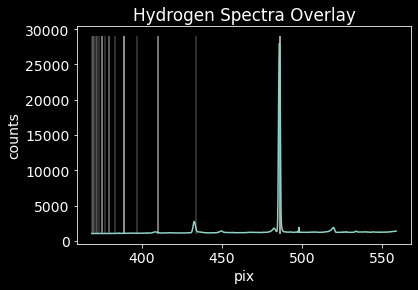

In [73]:
pl.plot(wavelengths, hy_spectrum)
pl.vlines(hydrogen_lines['Observed'], 1000, 29000, 'w', alpha=0.25);
pl.xlabel("pix")
pl.ylabel('counts')
pl.title('Hydrogen Spectra Overlay')

Text(0.5, 1.0, 'Hydrogen spectra with Sun spectrum')

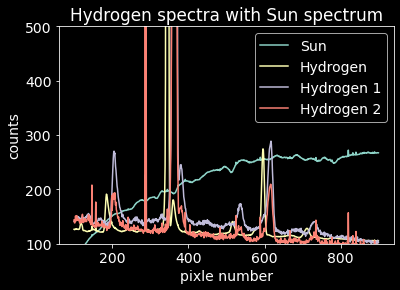

In [74]:
pl.plot(xaxis[100:], xaxis[100:]*sun_spectrum[100:]/4000, label = 'Sun')
pl.plot(xaxis[100:], hy_spectrum[100:]/10, label = 'Hydrogen');
pl.plot(xaxis[100:], hy1_spectrum[100:], label = 'Hydrogen 1');
pl.plot(xaxis[100:], hy2_spectrum[100:]-950, label = 'Hydrogen 2');
pl.ylim(100,500)
#pl.xlim(10,500)
pl.legend(loc='best');
pl.xlabel("pixle number")
pl.ylabel('counts')
pl.title("Hydrogen spectra with Sun spectrum")

# Helium

In [ ]:
tableHe = Nist.query(4000 * u.AA, 7000 * u.AA, linename="He")
print(tableHe)

Text(0.5, 1.0, 'Helium')

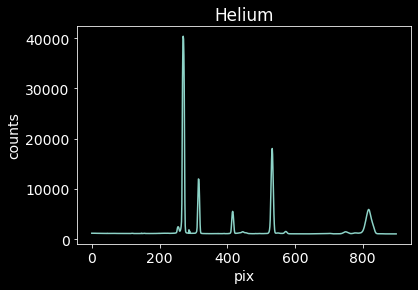

In [50]:
pl.plot(xaxis, he_spectrum);
pl.xlabel("pix")
pl.ylabel('counts')
pl.title("Helium")

Text(0.5, 1.0, 'Helium Spectra Overlay')

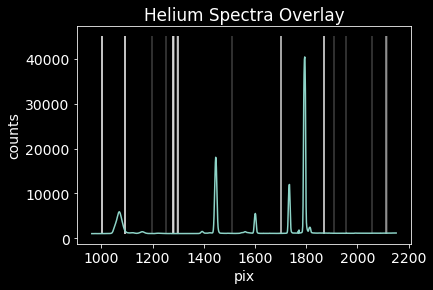

In [55]:
pl.plot(wavelengths, he_spectrum)
pl.vlines(helium_lines['Observed'], 1000, 45000, 'w', alpha=0.25);
pl.xlabel("pix")
pl.ylabel('counts')
pl.title('Helium Spectra Overlay')

# Neon

In [56]:
import pandas as pd
tableNe = Nist.query(4000 * u.AA, 7000 * u.AA, linename="Ne")
tableNe

Spectrum,Observed,Ritz,Transition,Rel.,Aki,fik,Acc.,Ei Ek,Lower level,Upper level,Type,TP,Line
str7,float64,float64,float64,str10,float64,float64,str3,str30,str38,str39,str2,str11,str11
Ne I,4000.394,4000.408,24997.54,10,--,--,--,18.38162323 - 21.480912,2s2.2p5.(2P*<3/2>).3p | 2[1/2] | 1,2s2.2p5.(2P*<1/2>).10s | 2[1/2]* | 0,--,--,L3469
Ne II,4000.602,4000.60273,24996.24,100,370000.0,0.0018,D,27.85915908 - 30.95829705,2s2.2p4.(3P).3s | 2P | 1/2,2s2.2p4.(3P).3p | 4D* | 3/2,--,T380,L1406
Ne VIII,4003.0,4004.0,24981.0,100bl,65100000.0,0.47,A,[225.1915] - [228.2878],1s2.8s | 2S | 1/2,1s2.9p | 2P* |,--,T7495,L9090
Ne II,4011.81,4011.827,24926.38,10,--,--,--,36.4926649 - 39.583132,2s2.2p4.(3P).4p | 2P* | 1/2,2s2.2p4.(3P).7s | 2P | 1/2,--,--,L11529
Ne I,4014.887,4014.887,24907.3,10,--,--,--,18.38162323 - 21.469735,2s2.2p5.(2P*<3/2>).3p | 2[1/2] | 1,2s2.2p5.(2P*<3/2>).12d | 2[3/2]* | 2,--,--,L3469
Ne I,4015.13,4015.11,24905.8,20,--,--,--,18.38162323 - 21.469565,2s2.2p5.(2P*<3/2>).3p | 2[1/2] | 1,2s2.2p5.(2P*<3/2>).12d | 2[1/2]* | 1,--,--,L3469
Ne I,4021.151,4021.179,24868.5,20,--,--,--,18.38162323 - 21.464903,2s2.2p5.(2P*<3/2>).3p | 2[1/2] | 1,2s2.2p5.(2P*<3/2>).13s | 2[3/2]* | 2,--,--,L3469
Ne II,4023.56,4023.5644,24853.63,5,--,--,--,36.46207411 - 39.5435260,2s2.2p4.(3P).4p | 2P* | 3/2,2s2.2p4.(3P).7s | 4P | 3/2,--,--,L11529c153
Ne II,4025.18,4025.1792,24843.61,80,--,--,--,35.19841919 - 38.2786348,2s2.2p4.(3P).4s | 2P | 1/2,2s2.2p4.(3P).5p | 2P* | 3/2,--,--,L1406


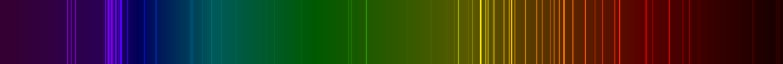


Text(0.5, 1.0, 'Neon')

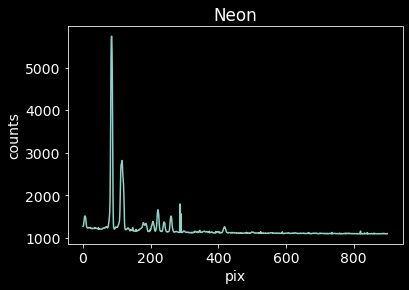

In [57]:
pl.plot(xaxis, ne_spectrum);
pl.xlabel("pix")
pl.ylabel('counts')
pl.title("Neon")

In [58]:
guessed_wavelengths_ne = [540, 535, 520, 518, 510, 507, 504]
guessed_xvals_ne = [80, 113, 187, 207, 220, 240, 260]

npixels = 10
improved_xval_guesses_ne = [np.average(xaxis[g-npixels:g+npixels],
                                    weights=ne_spectrum[g-npixels:g+npixels] - np.median(ne_spectrum))
                         for g in guessed_xvals_ne]
improved_xval_guesses_ne

[84.04518316319938,
 114.78478093524011,
 183.78829039174053,
 206.40975505276685,
 220.63915380859257,
 239.6429633695977,
 260.1708826893014]

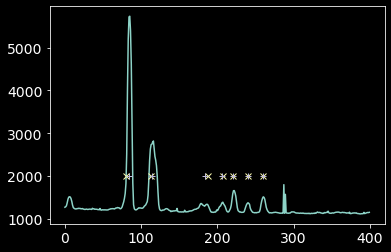

In [59]:
pl.plot(xaxis[0:400], ne_spectrum[0:400])
pl.plot(guessed_xvals_ne[0:400], [2000]*7, 'x')
pl.plot(improved_xval_guesses_ne[0:400], [2000]*7, '+');

In [60]:
linfitter = LinearLSQFitter()
wlmodel = Linear1D()
linfit_wlmodel = linfitter(model=wlmodel, x=improved_xval_guesses_ne, y=guessed_wavelengths_ne)
wavelengths = linfit_wlmodel(xaxis) * u.nm
linfit_wlmodel

<Linear1D(slope=-0.21101769, intercept=558.61766524)>

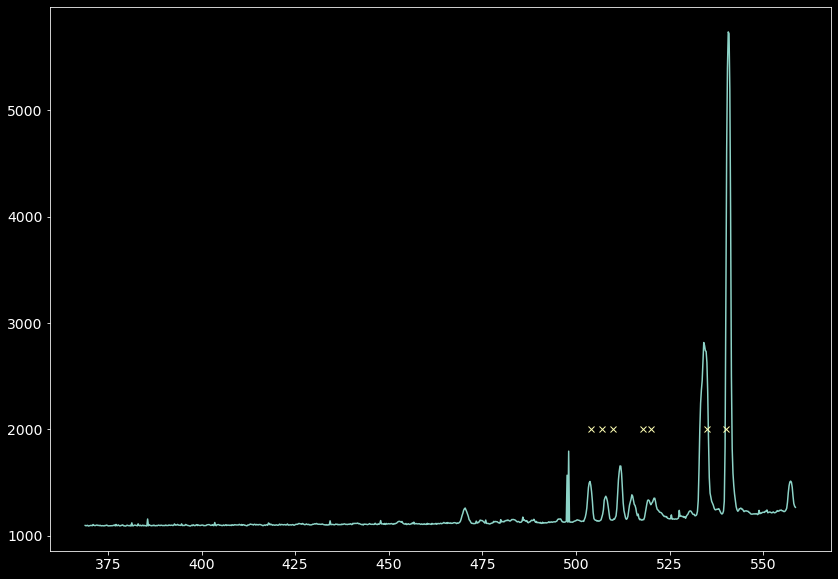

In [61]:
pl.figure(figsize = (14,10))
pl.plot(wavelengths, ne_spectrum)
pl.plot(guessed_wavelengths_ne, [2000]*7, 'x');

Text(0.5, 1.0, 'Neon Fit')

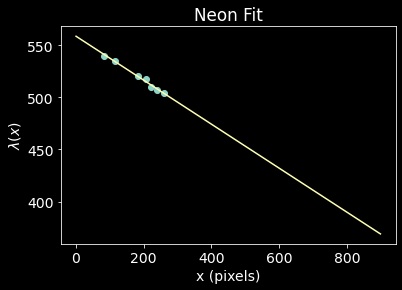

In [64]:
pl.plot(improved_xval_guesses_ne, guessed_wavelengths_ne, 'o')
pl.plot(xaxis, wavelengths, '-')
pl.ylabel("$\lambda(x)$")
pl.xlabel("x (pixels)")
pl.title("Neon Fit")

In [65]:
minwave = wavelengths.min()
maxwave = wavelengths.max()

hydrogen_lines = Nist.query(minwav=minwave,
                           maxwav=maxwave,
                           linename='H I')
helium_lines = Nist.query(minwav=minwave,
                           maxwav=maxwave,
                           linename='He I')
neon_lines = Nist.query(minwav=minwave,
                        maxwav=maxwave,
                        linename='Ne I')

Text(0.5, 1.0, 'Neon Spectra Overlay')

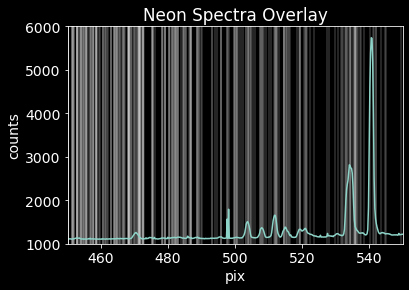

In [66]:
pl.plot(wavelengths, ne_spectrum)
pl.vlines(neon_lines['Observed'], 6000, 250, 'w', alpha=0.20);
pl.axis([450, 550, 1000, 6000])
pl.xlabel("pix")
pl.ylabel('counts')
pl.title('Neon Spectra Overlay')

In [67]:
ne_keep = np.array([('*' not in x) and ('f' not in x) for x in neon_lines['Rel.']])
ne_wl_tbl = neon_lines['Observed'][ne_keep]
ne_rel_tbl = np.array([float(x) for x in neon_lines['Rel.'][ne_keep]])

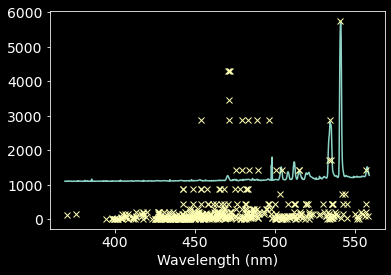

In [68]:
ne_rel_intens = ne_rel_tbl / ne_rel_tbl.max() * ne_spectrum.max()
pl.plot(wavelengths, ne_spectrum)
pl.plot(ne_wl_tbl, ne_rel_intens, 'x')
pl.xlabel('Wavelength (nm)');

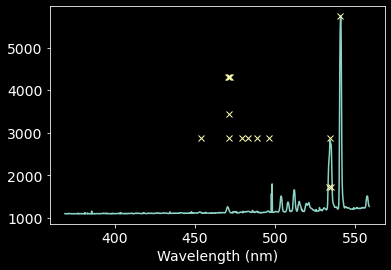

In [69]:
ne_keep_final = ne_rel_intens > 1500
pl.plot(wavelengths, ne_spectrum)
pl.plot(ne_wl_tbl[ne_keep_final], ne_rel_intens[ne_keep_final], 'x')
pl.xlabel('Wavelength (nm)');

In [70]:
ne_wl_final = ne_wl_tbl[ne_keep_final]
ne_pixel_vals = linfit_wlmodel.inverse(ne_wl_final)

In [71]:
npixels = 10
improved_xval_guesses_ne = [np.average(xaxis[g-npixels:g+npixels],
                                    weights=ne_spectrum[g-npixels:g+npixels] - np.median(ne_spectrum))
                         for g in map(int, ne_pixel_vals)]
improved_xval_guesses_ne

[525.9785306943977,
 418.1729633027523,
 418.12914795699726,
 417.7485068438266,
 417.5125463331328,
 417.0405190404364,
 374.0953070683661,
 358.58622830067657,
 332.5209137373527,
 290.4229791661179,
 115.9923643827471,
 115.12967868360643,
 114.97258363509087,
 84.6300646285281]

Text(0.5, 1.0, 'Improved Fit Neon')

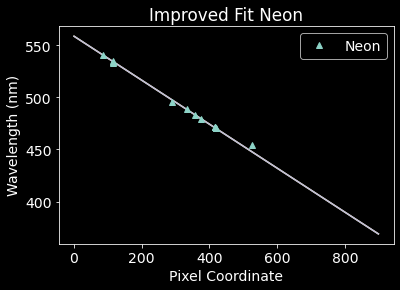

In [72]:
pl.plot(improved_xval_guesses_ne, ne_wl_final, '^', label='Neon')
#pl.plot(improved_xval_guesses, guessed_wavelengths, '+', label='Hydrogen')
pl.plot(xaxis, wavelengths, zorder=-5)
pl.plot(xaxis, linfit_wlmodel(xaxis), zorder=-5)
pl.legend(loc='best')
pl.xlabel("Pixel Coordinate")
pl.ylabel("Wavelength (nm)")
pl.title("Improved Fit Neon")